In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in wildfire csv and reduce columns
#pull out year and replace begin_date column with just year
#rename columns
wildfire_data = pd.read_csv("NOAA_csvs/wildfires_2010_2019.csv")
fire_df = pd.DataFrame(wildfire_data)
fire_df
fire_reduce = fire_df[["CZ_NAME_STR", "EVENT_ID", "BEGIN_DATE"]]
fire_reduce[['Month', 'Day', 'Year']] = fire_reduce['BEGIN_DATE'].str.split("/",expand=True)
wildfire = fire_reduce[["CZ_NAME_STR", "EVENT_ID", "Year"]]
wildfire.rename(columns={"CZ_NAME_STR": "Forecast Zone", "EVENT_ID": "Fire ID"}, inplace=True)
wildfire

c:\users\etrez\anaconda3\envs\pythondata2\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\users\etrez\anaconda3\envs\pythondata2\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Forecast Zone,Fire ID,Year
0,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,234746,2010
1,SAN DIEGO COUNTY COASTAL AREAS (ZONE),250167,2010
2,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,250175,2010
3,RIVERSIDE COUNTY MOUNTAINS (ZONE),250169,2010
4,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,250171,2010
...,...,...,...
393,VENTURA COUNTY COASTAL VALLEYS (ZONE),863910,2019
394,VENTURA COUNTY INTERIOR VALLEYS (ZONE),863913,2019
395,VENTURA COUNTY COASTAL VALLEYS (ZONE),863914,2019
396,VENTURA COUNTY COAST (ZONE),863915,2019


In [3]:
#read in drought csv and reduce columns
#pull out year and replace begin_date column with just year
#rename columns
drought_data = pd.read_csv("NOAA_csvs/drought_2010_2019.csv")
drought_df = pd.DataFrame(drought_data)
drought_reduce = drought_df[["CZ_NAME_STR", "EVENT_ID", "BEGIN_DATE"]]
drought_reduce[['Month', 'Day', 'Year']] = drought_reduce['BEGIN_DATE'].str.split("/",expand=True)
drought = drought_reduce[["CZ_NAME_STR", "EVENT_ID", "Year"]]
drought.rename(columns={"CZ_NAME_STR": "Forecast Zone", "EVENT_ID": "Drought ID"}, inplace=True)
drought

c:\users\etrez\anaconda3\envs\pythondata2\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\users\etrez\anaconda3\envs\pythondata2\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Forecast Zone,Drought ID,Year
0,SOUTHERN SACRAMENTO VALLEY (ZONE),497009,2014
1,SE KERN CTY DESERT (ZONE),498466,2014
2,INDIAN WELLS VLY (ZONE),498465,2014
3,TULARE CTY MTNS (ZONE),498464,2014
4,S SIERRA MTNS (ZONE),498463,2014
...,...,...,...
534,MOTHERLODE/CAMPTONVILLE TO GROVELAND (ZONE),699890,2017
535,NORTHERN SAN JOAQUIN VALLEY (ZONE),699859,2017
536,MOTHERLODE/CAMPTONVILLE TO GROVELAND (ZONE),699889,2017
537,MOTHERLODE/CAMPTONVILLE TO GROVELAND (ZONE),699893,2017


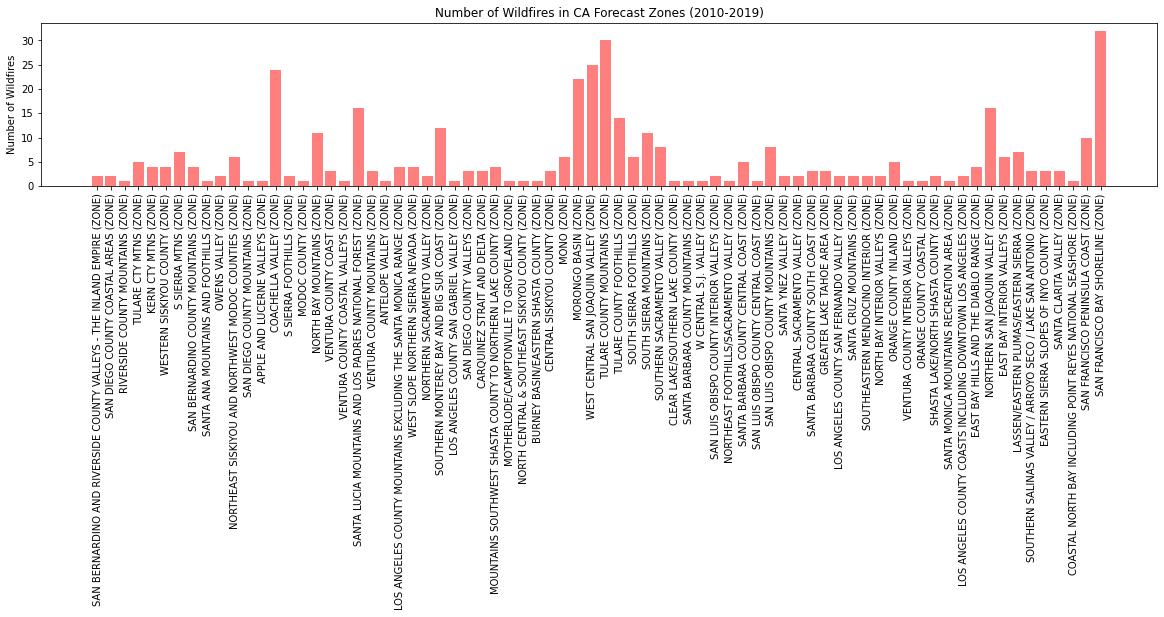

In [4]:
#bar chart of count of wildifres per zone
fire_gp = wildfire.groupby(wildfire["Forecast Zone"])
f_zone = wildfire["Forecast Zone"].unique()
fire_ct = fire_gp["Forecast Zone"].count()
f_tick_loc = [value for value in f_zone]
plt.figure(figsize=(20,3))
plt.bar(f_zone, fire_ct, color='r', alpha=0.5, align="center")
plt.xticks(f_tick_loc, f_zone, rotation="vertical")
plt.title("Number of Wildfires in CA Forecast Zones (2010-2019)")
plt.ylabel("Number of Wildfires")
plt.savefig('wildfires_per_zone.png', dpi=300, bbox_inches='tight')
plt.show()

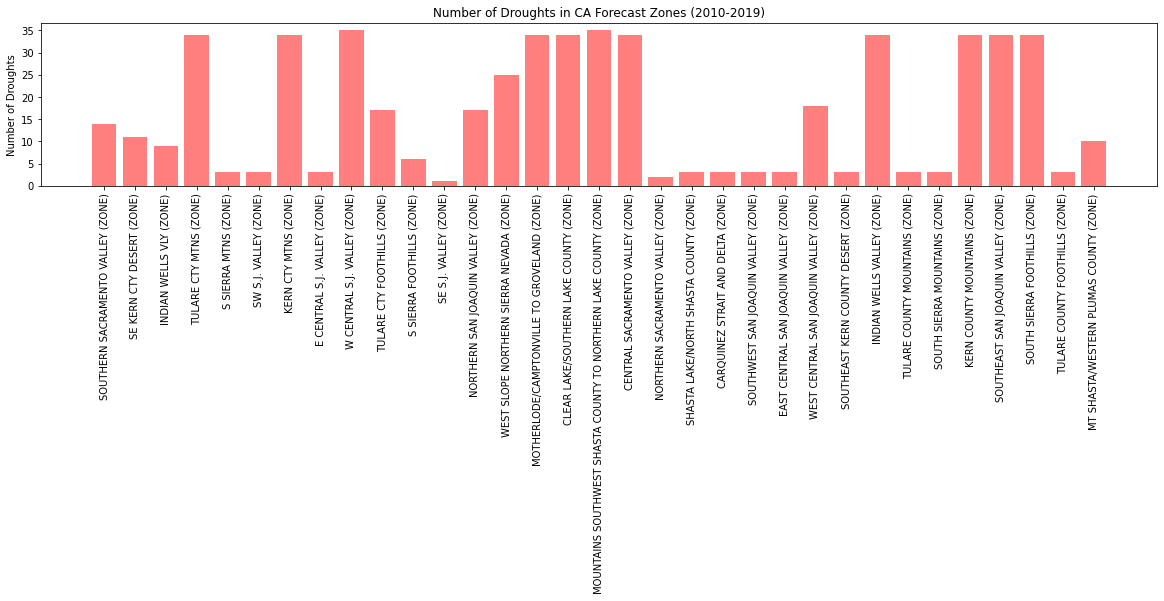

In [5]:
#bar chart of count of droughts per zone
drought_gp = drought.groupby(drought["Forecast Zone"])
dr_zone = drought["Forecast Zone"].unique()
dr_ct = drought_gp["Forecast Zone"].count()
dr_tick_loc = [value for value in dr_zone]
plt.figure(figsize=(20,3))
plt.bar(dr_zone, dr_ct, color='r', alpha=0.5, align="center")
plt.xticks(dr_tick_loc, dr_zone, rotation="vertical")
plt.title("Number of Droughts in CA Forecast Zones (2010-2019)")
plt.ylabel("Number of Droughts")
plt.savefig('droughts_per_zone.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
#new df with only zones with the top 10 wildfire count
fire_gp.count().sort_values("Fire ID", ascending=False).head(10)
top_fire = wildfire.loc[(wildfire['Forecast Zone'] == 'WESTERN SISKIYOU COUNTY (ZONE)') |
                       (wildfire['Forecast Zone'] == 'SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - THE INLAND EMPIRE (ZONE)') |
                      (wildfire['Forecast Zone'] == 'S SIERRA MTNS (ZONE)') | 
                      (wildfire['Forecast Zone'] == 'KERN CTY MTNS (ZONE)') |
                      (wildfire['Forecast Zone'] == 'S SIERRA FOOTHILLS (ZONE)') |
                      (wildfire['Forecast Zone'] == 'MODOC COUNTY (ZONE)') |
                      (wildfire['Forecast Zone'] == 'TULARE CTY MTNS (ZONE)') |
                      (wildfire['Forecast Zone'] == 'SAN BERNARDINO COUNTY MOUNTAINS (ZONE)') |
                      (wildfire['Forecast Zone'] == 'NORTH BAY MOUNTAINS (ZONE)') |
                      (wildfire['Forecast Zone'] == 'LOS ANGELES COUNTY MOUNTAINS EXCLUDING THE SANTA MONICA RANGE (ZONE)')]
top_fire_gp = top_fire.groupby(['Forecast Zone'])
top_fire_gp.count()

,Fire ID,Year
Forecast Zone,,
KERN CTY MTNS (ZONE),24,24
LOS ANGELES COUNTY MOUNTAINS EXCLUDING THE SANTA MONICA RANGE (ZONE),11,11
MODOC COUNTY (ZONE),16,16
NORTH BAY MOUNTAINS (ZONE),12,12
S SIERRA FOOTHILLS (ZONE),22,22
S SIERRA MTNS (ZONE),25,25
SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - THE INLAND EMPIRE (ZONE),30,30
SAN BERNARDINO COUNTY MOUNTAINS (ZONE),14,14
TULARE CTY MTNS (ZONE),16,16


In [7]:
#new drought df using same zones as top 10 wildefire df
top_drought = drought.loc[(drought['Forecast Zone'] == 'WESTERN SISKIYOU COUNTY (ZONE)') |
                       (drought['Forecast Zone'] == 'SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - THE INLAND EMPIRE (ZONE)') |
                      (drought['Forecast Zone'] == 'S SIERRA MTNS (ZONE)') | 
                      (drought['Forecast Zone'] == 'KERN CTY MTNS (ZONE)') |
                      (drought['Forecast Zone'] == 'S SIERRA FOOTHILLS (ZONE)') |
                      (drought['Forecast Zone'] == 'MODOC COUNTY (ZONE)') |
                      (drought['Forecast Zone'] == 'TULARE CTY MTNS (ZONE)') |
                      (drought['Forecast Zone'] == 'SAN BERNARDINO COUNTY MOUNTAINS (ZONE)') |
                      (drought['Forecast Zone'] == 'NORTH BAY MOUNTAINS (ZONE)') |
                      (drought['Forecast Zone'] == 'LOS ANGELES COUNTY MOUNTAINS EXCLUDING THE SANTA MONICA RANGE (ZONE)')]
top_drought

,Forecast Zone,Drought ID,Year
3,TULARE CTY MTNS (ZONE),498464,2014
4,S SIERRA MTNS (ZONE),498463,2014
6,KERN CTY MTNS (ZONE),498462,2014
10,S SIERRA FOOTHILLS (ZONE),498460,2014
12,S SIERRA MTNS (ZONE),510020,2014
...,...,...,...
519,S SIERRA FOOTHILLS (ZONE),673999,2017
521,KERN CTY MTNS (ZONE),674001,2017
522,S SIERRA MTNS (ZONE),674002,2017
526,TULARE CTY MTNS (ZONE),674003,2017


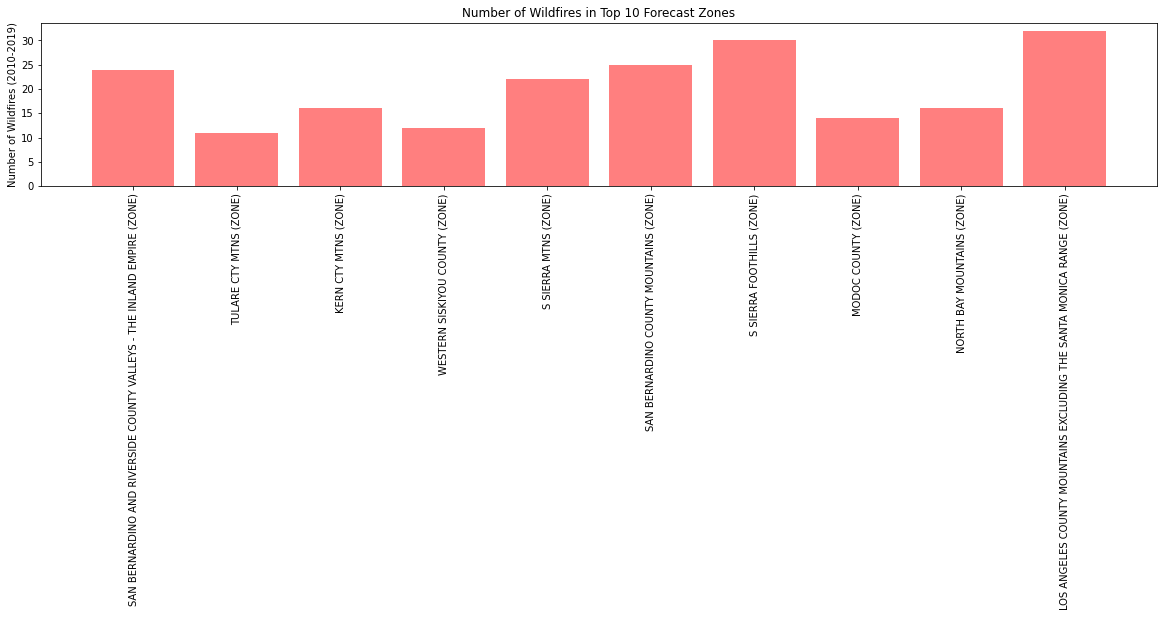

In [23]:
#bar graph of count of wildfires in top ten zones
top_fire_group = top_fire.groupby(top_fire["Forecast Zone"])
tf_zone = top_fire["Forecast Zone"].unique()
tf_ct = top_fire_group["Forecast Zone"].count()
tf_tick_loc = [value for value in tf_zone]
plt.figure(figsize=(20,3))
plt.bar(tf_zone, tf_ct, color='r', alpha=0.5, align="center")
plt.xticks(tf_tick_loc, tf_zone, rotation='vertical')
plt.title("Number of Wildfires in Top 10 Forecast Zones")
plt.ylabel("Number of Wildfires (2010-2019)")
plt.show()

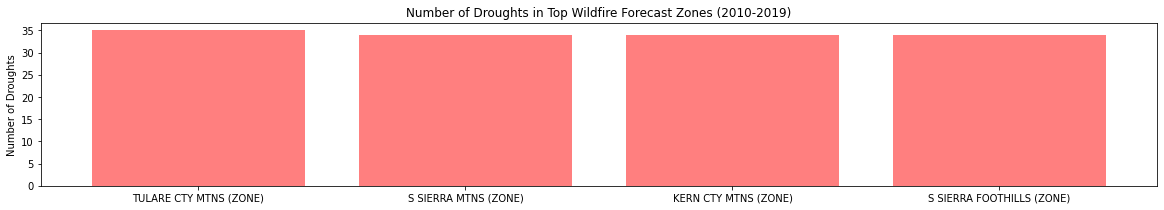

In [24]:
#bar graph with drought counts for top wildefire zones (only 4 have corresponding drought data)
top_dr_group = top_drought.groupby(top_drought["Forecast Zone"])
td_zone = top_drought["Forecast Zone"].unique()
td_ct = top_dr_group["Forecast Zone"].count()
td_tick_loc = [value for value in td_zone]
plt.figure(figsize=(20,3))
plt.bar(td_zone, td_ct, color='r', alpha=0.5, align="center")
plt.xticks(td_tick_loc, td_zone)
plt.title("Number of Droughts in Top Wildfire Forecast Zones (2010-2019)")
plt.ylabel("Number of Droughts")
plt.show()

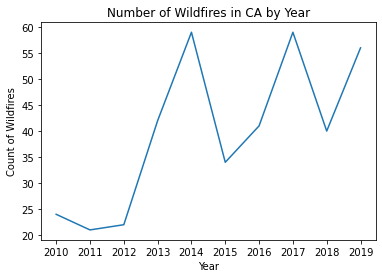

In [8]:
#Plot total count of wildfires in CA by year
wildfire_year_group = wildfire.groupby(wildfire["Year"])
xaxis = wildfire["Year"].unique()
yaxis = wildfire_year_group["Fire ID"].count()
plt.plot(xaxis, yaxis)
plt.title("Number of Wildfires in CA by Year")
plt.xlabel("Year")
plt.ylabel("Count of Wildfires")
plt.savefig('wildfires_per_year.png', dpi=300, bbox_inches='tight')
plt.show()

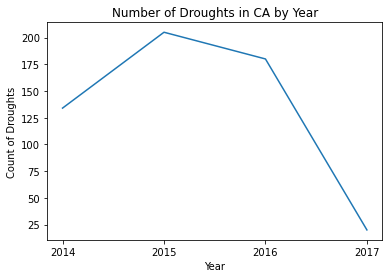

In [9]:

drought_by_year = drought.groupby(drought["Year"])
drought_count = drought_by_year["Drought ID"].count()
drought_years = drought["Year"].unique()
plt.plot(drought_years, drought_count)
plt.title("Number of Droughts in CA by Year")
plt.xlabel("Year")
plt.ylabel("Count of Droughts")
plt.savefig('droughts_per_year.png', dpi=300, bbox_inches='tight')
plt.show()
#There is only drought data from 2014-2017

In [10]:
#reduce drought data to only years with drought data
reduced_year_fire = wildfire.loc[(wildfire["Year"] == "2014") |
                                (wildfire["Year"] == "2015") |
                                (wildfire["Year"] == "2016") |
                                (wildfire["Year"] == "2017")]
reduced_year_fire

,Forecast Zone,Fire ID,Year
109,TULARE CTY MTNS (ZONE),510074,2014
110,LOS ANGELES COUNTY MOUNTAINS EXCLUDING THE SAN...,498029,2014
111,LOS ANGELES COUNTY SAN GABRIEL VALLEY (ZONE),498030,2014
112,COACHELLA VALLEY (ZONE),509773,2014
113,SAN BERNARDINO AND RIVERSIDE COUNTY VALLEYS - ...,511806,2014
...,...,...,...
297,SANTA BARBARA COUNTY SOUTH COAST (ZONE),729840,2017
298,SANTA BARBARA COUNTY MOUNTAINS (ZONE),729839,2017
299,VENTURA COUNTY MOUNTAINS (ZONE),729838,2017
300,VENTURA COUNTY INTERIOR VALLEYS (ZONE),729837,2017


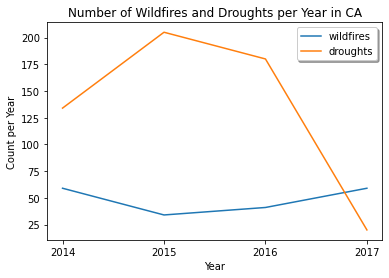

In [11]:
#Plot both wildfire and drought data on same line graph
#Get count of wildfires by year for CA (only 2014-17 so it can be compared to drought data)
fire_by_year = reduced_year_fire.groupby(reduced_year_fire["Year"])
years = reduced_year_fire["Year"].unique()
fire_count = fire_by_year["Fire ID"].count()
#Get count of droughts per year for CA
drought_by_year = drought.groupby(drought["Year"])
drought_count = drought_by_year["Drought ID"].count()
#plot both lines, add labels and a legend
fig, ax = plt.subplots()
ax.plot(years, fire_count, label="wildfires")
ax.plot(years, drought_count, label="droughts")
legend = ax.legend(loc='best', shadow=True)
plt.xlabel("Year")
plt.ylabel("Count per Year")
plt.title("Number of Wildfires and Droughts per Year in CA")
plt.savefig('fires_and_droughts_by_year.png', dpi=300, bbox_inches='tight')
plt.show()
